<center><img src="./Assets/Unige.svg" alt="logo" width="250"/></center>

# Graph Anonymization: A comparison between Dynamic Programing and Greedy-swap Algorithm

#### Sanchayan Bhunia $(4849650)$, Sahitya Reddy Bollavaram $(4849759)$ <br> Date: $8^{th}$ March $2021$
***

## 1. Introduction
### 1.1. What is a Graph?
A Graph is a structure to represent a set of objects where <u>some pairs</u> of objects are "related". Each object can be represented by a <b>node</b> and the relation between pairs can be represented by an <b>edge</b> connecting them.

<center><img src="Assets/simple_graph.svg" alt="simple_graph" width="250"/></center>
<br>
<center><strong><em>figure:</em></strong>A Simple Graph</center>
<br>

### Direction of a Graph
Based upon the relationship between a pair of nodes, a graph can be categorized between a **Directed Graph** or an **Undirected Graph**.
### Directed Graph
Directed Graphs are the graphs where the relationship between pairs is directional. 

<center><img src="Assets/directed_graph.svg" alt="drawing" width="250"/></center>
<br>
<center><strong><em>figure:</em></strong> A Simple Directed Graph</center>
<br>

### 1.2. Undirected Graph
Undirected graphs are the graphs where the relationship between pairs do not have a direction. Each of the nodes can be *uniquely* represented with the **Index** of the node and number of **Edges**(relationships) it has with other nodes.

<center><img src="Assets/undirected_graph.svg" alt="drawing" width="250"/></center>
<br>
<center><strong><em>figure:</em></strong> A Simple Undirected Graph</center>
<br>

If, $V$ is the set of all vertices and $E$ is the set of all edges.
Then the whole grahp, $G$ can be represented as a collection of Vertices$(v)$ and Edges$(e)$. 

$$
\begin{equation}
G = \big\{(v_{1}, e_{1}), \, (v_{2}, e_{2}), \, ... \, , \, (v_{i}, e_{i})\big\}
\end{equation}
$$

where $v_{i} \in V$ and $e_{i} \in E$


### 1.3. Degree Sequence
A **degree** of a vertice $(v)$ is the the number of edges, $(e)$ it has. We can collect of all degrees corresponding to all of the vertices and make a set. E.g. such a *set* for our example graph is : $\big\{2,3,2,3,3,1\big\}$.
The **Degree Sequence** $(d_{G})$ of a Graph $(G)$ is just re-ordering such a *set* in a decreasing sequence. E.g. The degree sequence of our example graph is : $\big\{3,3,3,2,2,1\big\}$.
<br>
<br>
As we can see here that the degree sequence has same number of elements as the number of vertices in the graph. i.e. if there are $n$ number of nodes in the graph, degree sequence will be a vector of length $n$.


## 2. Graph Anonymization
In order for an organization to sell or share graph data, the data needs to anonymized in order to respect its privacy policies. In a typical graph database there are *three* types of anonymizations those need to be performed namely *Identitiy Protection*, *Content Protection* and *Link Protection*. <br>
$k$-Degree anonimization is a graph modification technique used to anonymize the identity of the nodes with certain *$k$* degree.


### 2.1. $k$-Degree Anonymity
The main goal of the k-degree anonimization is to make sure that, for each node $(v)$ in the graph $G$ there exists alteast $k-1$ other nodes with the same degree as $v$. <br>
If the graph $G$ has $n$ nodes, the *degree sequence $(d_{G})$* of $G$ is an $n$ dimensional vector with, $d_{G}(i) \ge d_{G}(j) \; \forall \; j > i$ where $i$ and $j$ are two the indices of the vector $d_{G}$.<br>

The vector $d_{G}$ is *k-anonymous* if every distinct value in $d_{G}$ appears **atleast** $k$ times. The graph $G$ corresponding to $d_{G}$ will be called *$k$-Degree anonymous* **iff** $d_{G}$ is *k-anonymous*.<br>

For our example graph to be *$3$-Degree anonymous*, we have to modify the degree sequence, $\big\{3,3,3,2,2,1\big\}$ to $\big\{3,3,3,2,2,2\big\}$.

#### 2.1.1. Cost function
One of the ways to quantify the anonymization cost is by using a cost function $L_{1}$. Given a graph $G$ and its anonymized form $\hat{G}$ the cost function $L_{1}$ returns the total cost of turning $d_{G}$ into $d_{\hat{G}}$.

$$
\begin{equation}
L_{1}\big(d_{G}, \, d_{\hat{G}}\big) = \sum_{i=1}^{n} \Bigg| \, d_{\hat{G}}(i) - d_{G}(i) \, \Bigg| 
\end{equation}
$$

For our example graph, the cost of anonymization, $$L_{1} = |3-3| + |3-3| + |3-3| + |2-2| + |2-2| + |2-1| = 1$$ 

### 2.2. $k$-Degree Anonymization Algorithms
The job of a $k$-Degree Anonymization algorithm is to take an input graph $G$ and an integer $k$ to output a $k$-Degree anonymized graph $G'$ keeping the cost $L_{1}$ minimum.<br>
$k$-Degree Anonymity can be achieved both by using *dynamic programming* and *greedy-swap* algorithms but anonymization cost $L_{1}$, might differ form one method to another.

#### 2.2.1. Dynamic Programing
Dynamic programing is implemented by breaking the problem into smaller recurring sub-problems.<br>
<ol>

<li>Let suppose, we have a degree sequence $d$ of dimension $n$ and by definition it is sorted. i.e. 
$$
\begin{equation}
d(1) \, \ge \, d(2) \, \ge \, ... \, \ge \, d(n)
\end{equation}
$$
<br>
<li>Let, $Da\big(d[1,i]\big)$ be the degree anonymization cost of the sub-sequence $d[1,i]$.
<br>
<br>
<li> Also let, $I\big(d[i,j]\big)$ be the anonymization cost when all the elements from $d(i), d(i+1), ..., d(j)$ are assigned the same value as $d(i)$. i.e.
$$
\begin{equation}
I(d[i,j]) = \sum_{l=i}^{j}\big(d(i) - d(l)\big)
\end{equation}
$$
    
</ol>
<br>
Given these assumptions, a dynamic algorithm can be formed as the following,<br>

##### Condition 1:

When, $k \gt \frac{i}{2}$, it is *impossible* to form two groups with distinct values. So, we put them in the same group. E.g. for a 3-Degree anonymization of a sub-sequence $d[1,4] = \big\{3,3,2,2\big\}$ has to be $\big\{3,3,3,3\big\}$. So, the cost of anonymization can be calculated like the following, 
$$
\begin{equation}
Da\big(d[1,i]\big) = I\big(d[1,i]\big)
\end{equation}
$$

##### Condition 2:

When, $k \le \frac{i}{2}$ the degree sequence can be broken down in smaller sub-sequences recurssively until the size of the sub-sequence follows *Condition 1*. At this stage, every recursive step will have some *chunk* of the degree sequence with a length $\lt 2k$ and for the rest of the sub-sequence we can apply the same method recurssively. And the total cost for that step will be sum over the cost of putting the a chunk in the same group and the cost of anonymizing the rest of the degree sequence recursively. And then we can *vary* the size of each chunk $t$ and take the take the anonymized sequence with mininum cost and return it to the previous recurssive stage in the *heap*.
<br>
$$
\begin{equation}
Da\big(d[1, i]\big) = \min\bigg\{ \min_{k \, \le \, t \, \le \, i-k}\Big\{Da\big(d[1, t]\big)+I\big(d[t+1, \, i-k]\big)\Big\}, \; I\big(d[1, i]\big)\bigg\}
\end{equation}
$$

##### The Dynamic Programing Algorithm
<center><img src="Assets/recursion_heap.svg" alt="drawing" width="500"/></center>
<br>
<center><strong><em>figure:</em></strong> Recursion Heap</center>
<br>


In [1]:
# This function takes a full or part of a sequence and converts all of the values to the heighest value in the sequence
# then it returns the cost of the operation and the converted sequence.

# To eliminate any delay due to searching in a list, we will rather use key,value pairs to store them in a dictionary

def putInSameGroup(sequence): 
    cost = 0
    for i in range(len(sequence)):
        cost +=  sequence[0] - sequence[i]
    
    return cost, [sequence[0]]*len(sequence)
    

# Input: degree sequence and the value of k as input
# Output: the cost of anonymization, anonymized sequence
def dynamicPrograming(k, degree_sequence): 

    number_of_nodes = len(degree_sequence)
    cost_vs_degree_sequences = dict()
    
    # Condition 1
    if k > number_of_nodes / 2:
        return putInSameGroup(degree_sequence)

    # Condition 2
    else:
        cost_vs_degree_sequences.clear()
        lower_range = k
        upper_range = number_of_nodes - k+1
        
        for chunk in range(lower_range, upper_range):
            # This is the sub-sequence which will be Anonymized
            to_anonymize = degree_sequence[0: chunk]     
            
            # Rest of the sequence to put in the same group
            in_same_group = degree_sequence[chunk: number_of_nodes] 
            
            # The recurssion step
            cost_anonymize, sequence_anonymized = dynamicPrograming(k, to_anonymize)
            
            # part where we put them in same group
            cost_same_group, same_group_squence = putInSameGroup(in_same_group)
            
            # Total cost is calculated for this level in the stack
            chunk_cost = cost_anonymize + cost_same_group
            
            # And the anonymized sequence in this level
            anonymized_chunk = sequence_anonymized + same_group_squence
            
            # Cost and corresponding sequence is stored as (key, value) pair
            cost_vs_degree_sequences[chunk_cost] = anonymized_chunk 
            
            #print((chunk, number_of_nodes), anonymized_chunk)
        
        # Now we will search for the minimum cost in key-space and return corresponding (cost, anonymized sequence) pair 
        return min(cost_vs_degree_sequences.items(), key = lambda x: x[0])


##### Artificial Data Generator
Now, we will *define a function* to generate degree sequence of *desired* length, lowest and highest degree value. As oppose to the *real* data, this artificial data will help us to find out the run-time of the algorithm for degree list of different sizes which is useful to quantify the effects of additional modifications to the algorithm.

In [2]:
import numpy as np
from numpy import random

# Given a length this function will output a degree sequence. 
# Additionally it is also possible to mention the highest and athe lowest degree
def generateDegreeSequence(length, lowest_degree = 1, highest_degree = None):
    
    if highest_degree == None:
        highest_degree = length
        
    degree_list = random.randint(high = highest_degree+1, low = lowest_degree, size=length)
    degree_sequence = np.sort(degree_list)[::-1]
    return degree_sequence.tolist()

##### Checking if our algorithm actually works
Now let's generate a degree sequence and check our dynamic programing graph anonymization algorithm.

In [3]:
k = random.randint(low=3, high=10) 
degree_sequence = generateDegreeSequence(20, lowest_degree = 1, highest_degree = 15)
print("Not Anonymized Sequence: {}".format(degree_sequence))
anonymization_cost, anonymized_sequence = dynamicPrograming(k, degree_sequence)
print("{}-Anonymized Sequence:{}".format(k, anonymized_sequence))
print("Anonymization Cost = {}".format(anonymization_cost))

Not Anonymized Sequence: [15, 14, 13, 13, 11, 8, 8, 8, 7, 6, 5, 5, 3, 3, 3, 2, 2, 1, 1, 1]
3-Anonymized Sequence:[15, 15, 15, 15, 15, 8, 8, 8, 8, 6, 6, 6, 3, 3, 3, 3, 3, 1, 1, 1]
Anonymization Cost = 14


##### Time Complexity 
Now let us focus on the time complexity of this algorithm. We will take a bunch of degree lists of **varying size** and plot the computation time to anonymize them.

Done                                                                                                    


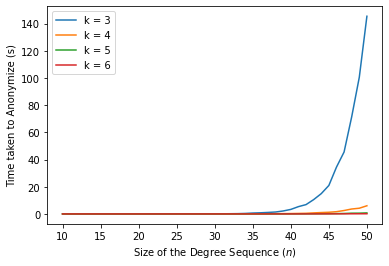

In [155]:
import time
from matplotlib import pyplot as plt

for k in range(3, 7):
    size_of_sequence = list() 
    performance = list()
    
    for size in range(10, 51):
        degree_sequence = generateDegreeSequence(size) # Generates the degree sequence
        start_timer = time.time()               # start timer
        dynamicPrograming(k, degree_sequence)  # Algorithm called for observation
        end_timer = time.time() # stop timer
        time_taken = end_timer - start_timer
        
        size_of_sequence.append(size)        # stores the size^(2) of a degree sequence
        performance.append(time_taken)       # stores the time taken by the algorithm for that degree sequence 
        
        # Shell Massage
        print('{}-Degree Anonymizing Sequence of length {}. Please wait ...'.format(k, size), end='\r', flush=True)
    
    plt.plot(size_of_sequence, performance, label='k = {}'.format(k))


print('{}\r'.format('Done'+' '*100)) # Clearing Shell Message  
plt.xlabel("Size of the Degree Sequence ($n$)")
plt.ylabel("Time taken to Anonymize (s)")
plt.legend()
plt.show()

#### Observation
Lower the degree anonymization factor $k$, higher it takes to anonymize the sequence. With this small amount of data it *can not* be verified that time complexity is $O(n^{2})$. It took around $100$ seconds to $3$-degree anonymize a sequence of length $50$. There are multiple ways to bring down the anonymization time. One of them is by optimizing the algorithm.

##### Optimization
From observation, it can be confirmed that *no anonymous group* is larger than $2k − 1$. If any group is larger than or equal to $2k$, it can be *broken into two subgroups* with equal or lower overall degree-anonymization cost. Which essencially turns out that the preprocessing step $I\big(d[i,j]\big)$ does not need to consider all of the combinations of $\big(i,j\big)$ but only, $k \, \le \, j-i+1 \, \le \, 2k-1$.
<br>
Similarly, for every $i$, we do not have to consider all $t$’s in the range $k \le t \le i − k$ in Recursion, but only $t$’s in the range $\max\big\{k, i − 2k + 1\big\} \le t \le i − k$.
<br>
<br>
$$
\begin{equation}
Da\big(d[1, i]\big) = \min\bigg\{ \min_{\max\{k, \, i − 2k + 1\} \, \le \, t \,  \le \, i − k}\Big\{Da\big(d[1, t]\big)+I\big(d[t+1, i-k]\big)\Big\}, \; I\big(d[1, i]\big)\bigg\}
\end{equation}
$$

#### Python Implementation
So, the *optimization* is essencially done by changing the lower limit of the *range of value* that every iteration of $t$ (i.e. chunk in code). 


In [23]:
# Input: degree sequence and the value of k as input
# Output: the cost of anonymization, anonymized sequence
def optimizedDynamicPrograming(k, degree_sequence): 

    number_of_nodes = len(degree_sequence)
    cost_vs_degree_sequences = dict()
    
    if k > number_of_nodes / 2:
        return putInSameGroup(degree_sequence)

    else:
        cost_vs_degree_sequences.clear()
        lower_range = max(k, (number_of_nodes - 2*k + 1)) #The lower range is replaced with optimized range
        upper_range = number_of_nodes - k+1
        for chunk in range(lower_range, upper_range):
            to_anonymize = degree_sequence[0: chunk]                
            in_same_group = degree_sequence[chunk: number_of_nodes] 
            
            cost_anonymize, sequence_anonymized = optimizedDynamicPrograming(k, to_anonymize)
            cost_same_group, same_group_squence = putInSameGroup(in_same_group)
        
            chunk_cost = cost_anonymize + cost_same_group
            anonymized_chunk = sequence_anonymized + same_group_squence
            cost_vs_degree_sequences[chunk_cost] = anonymized_chunk
        
        return min(cost_vs_degree_sequences.items(), key = lambda x: x[0])


Done                                                                                                    


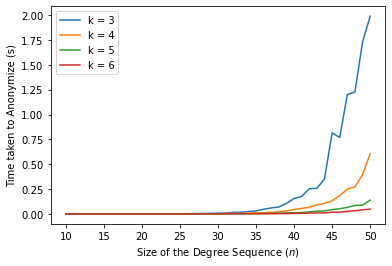

In [153]:
for k in range(3, 7):
    size_of_sequence = list()
    performance = list()
    
    for size in range(10, 51):
        degree_sequence = generateDegreeSequence(size)
        start_timer = time.time()
        optimizedDynamicPrograming(k, degree_sequence)
        end_timer = time.time()
        time_taken = end_timer - start_timer
        
        size_of_sequence.append(size)
        performance.append(time_taken)
        
        # Shell Message
        print('{}-Degree Anonymizing Sequence of length {}. Please wait ...'.format(k, size), end='\r', flush=True)
    
    
    plt.plot(size_of_sequence, performance, label='k = {}'.format(k))

    
print('{}\r'.format('Done' + ' '*100)) # Clearing Shell Message

plt.xlabel("Size of the Degree Sequence ($n$)")
plt.ylabel("Time taken to Anonymize (s)")
plt.legend()
plt.show()

#### Observation
Again, lower the value of $k$ higher it takes to anonymize the sequence. For this small set of degree sequences it can not be proved that the complexity is $O(kn)$ but, it is certain that range optimization improves performance. It took around $1.5$ seconds to $3$-degree anonymize a sequence of same length. Which is approximately $100$ times faster than unoptimized algorithm.
<br>

#### 2.2.2. Memorized Dynamic Programing
There is one more way to bring down the run-time of this algorithm, that is by *memorization*. But in order to find out what to memorize, we have to look at the dynamic programing algorithm closely.

In [43]:
def dynamicPrograming_observe(k, degree_sequence):  #As we are making some changes in the code, we want to give a new name 

    number_of_nodes = len(degree_sequence)
    cost_vs_degree_sequences = dict()

    if k > number_of_nodes / 2:
        return putInSameGroup(degree_sequence)

    else:
        cost_vs_degree_sequences.clear()
        for chunk in range(k, number_of_nodes - k+1):
            to_anonymize = degree_sequence[0: chunk]     
            in_same_group = degree_sequence[chunk: number_of_nodes]
            
            cost_anonymize, sequence_anonymized = dynamicPrograming_observe(k, to_anonymize)
            cost_same_group, same_group_squence = putInSameGroup(in_same_group)
            
            chunk_cost = cost_anonymize + cost_same_group
            anonymized_chunk = sequence_anonymized + same_group_squence
            cost_vs_degree_sequences[chunk_cost] = anonymized_chunk 
            
            #print((chunk, number_of_nodes), anonymized_chunk) #Printing this for observation
            
        return min(cost_vs_degree_sequences.items(), key = lambda x: x[0])
    
    
# Generating a degree sequence of length 20 for testing
degree_sequence = generateDegreeSequence(20)
k = 3
dynamicPrograming_observe(k, degree_sequence)

(15, [20, 20, 20, 14, 14, 14, 14, 14, 10, 10, 10, 7, 7, 7, 4, 4, 4, 2, 2, 2])

##### Analysis
In the whole recursion heap some anonymized sub-sequence (i.e. *anonymized_chunk* in the coed) appears multiple number of times. To be more specific, every time when the tuple (*chunk, number_of_nodes*) appears. But we are spending computational resources every time. 
<br>
Instead we can **memorize** the *anonymization cost* and *anonymized chunk* and recall it every time we encounter the specific tuple through out the entire heap. We will use (*chunk, number_of_nodes*) as **key** to store (anonymization cost, anonymized sub-sequence) as its **value** in a Dictionary called *cache*. By default Python Dictionary will store the key as a *hash* value in its key space. So, serching for a *value* using *key* is constant in time. Which, as opposed to storing them as lists will not affect the time complexity of the algorithm.   
<br>
<br>
As optimization discussed earlier just modifies the range of iteration, memorized algorithm can also benifit from it.   

### 2.3. The "Dynamic Module" and its Usage
We have created a python module called *dynamic* which not only inclueds both unoptimised and optimized dynamic programing algorithm but also includes memorized dynamic algorithm as well. Oppose to the code written in this notebook, the module is flexible in terms of values of k, accepts degree list/tuples/numpy arrays which is unordered and provide easy debugging features like Exceptions.
<br>
* ### a. Using the module
*import* **dynamic**
<br>
<br>
* ### b. dynamic.calculateCost(original_list, modified_list)
    Calculates the cost of transforming one list into another list.
    
    * #### Input: 

        * **original_list**-- A list as with which to comapair. Accepted data types *list/tuples/numpy arrays*.
        * **modified_list**-- A list to compair with original_list. Accepted data types *list/tuples/numpy arrays*.

    * #### Output: 
        * Cost of transforming one into another. Datatype is int/float.
<br>
<br>
* ### c. dpGraphAnonymization(k, degree_sequence, optimization)
    This method is essencially both optimized and unoptimized the dynamic graph anonymization algorithm.

    * #### Input:
    
        * **k**-- A value of $k$, the degree anonymization factor, of type *int*. 
        * **degree_sequence**-- Degree sequence (ordered/unordered) of data type <em>lists/tuples/numpy arrays</em>.
        * **optimization**-- This argument decides if the algorithm is going to be an optimized dynamic algorithm or an unoptimized dyanmic algorithm. This argument is *optional* and takes a *boolean* input. Which is *False* by default. I.e. by default *dpGraphAnonymization()* runs unoptimized algorithm.   

    * #### Output:
        * The method returns two outputs. The first output is the *cost of anonymization* which is of type *int* and the second output is the anonymized degree sequence, which is a *list*.  
<br>
<br>
* ### d. memorizedDPGraphAnonymization(k, degree_sequence, optimization)
    This method is essencially both optimized and unoptimized the *memorized* dynamic graph anonymization algorithm.

    * #### Input:
    
        * **k**-- A value of $k$, the degree anonymization factor, of type *int*. 
        * **degree_sequence**-- Degree sequence (ordered/unordered) of data type *lists/tuples/numpy arrays*.
        * **optimization**-- This argument decides if the algorithm is going to be an optimized memorized dynamic algorithm or  an unoptimized memorized dyanmic algorithm. This argument is *optional* and takes a *boolean* input. Which is *False* by default. I.e. by default *memorizedDPGraphAnonymization()* is unoptimized algorithm.

    * #### Output:
        * The method returns two outputs. The first output is the *cost of anonymization* which is of type *int* and the second output is the anonymized degree sequence, which is a *list*.
<br>

#### Conformance Checking
From now on we will use the algorithms from the <strong>dynamic</strong> module. With that in mind, lets check if the memorized dynamic algorithm produces <em>identical</em> outcomes as the original algorithm and if so, what is the running time of the process.

In [ ]:
#Compairing Memorized vs optimized dynamic programming from paper
import dynamic

for k in range(3, 11):
    match_list = list()
    
    for size in range(10, 51):
        
        degree_sequence = generateDegreeSequence(size)
        cost_dy, anonymized_seq_dy = dynamic.dpGraphAnonymization(k, degree_sequence, optimization=True)
        cost_mem, anonymized_seq_mem = dynamic.memorizedDPGraphAnonymization(k, degree_sequence, optimization=True)
        
        if cost_dy == cost_mem and anonymized_seq_dy == anonymized_seq_mem:
            match_list.append("match")
        
        else:
            match_list.append("mis_match")
            
    total_matches = match_list.count("match")
    match_percentage = total_matches/len(match_list)*100
    
    print("for k = {} outcomes from dynamic and memorized matches {}%".format(k, match_percentage))
    

for k = 3 outcomes from dynamic and memorized matches 100.0%


#### Performance Checking
Now, as we have checked that results are identical for both of the algorithms, let's check the running time of **memorized** dynamic graph anonymization algorithm. We will check both *optimized and unoptimized* memorized algorithm.  

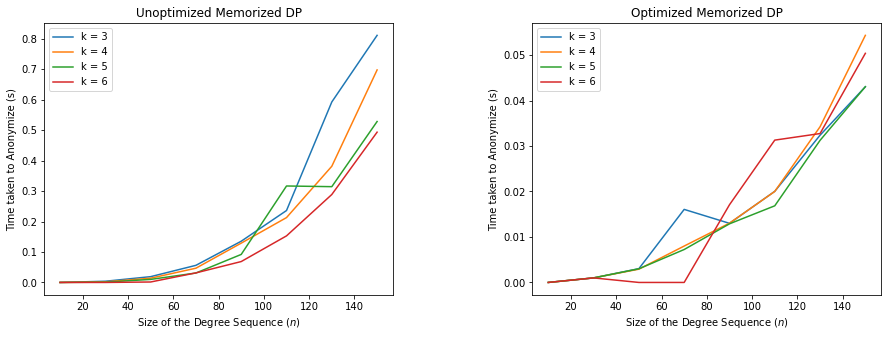

In [94]:
import time
# Just the memorized algorithms with and without optimization 

figure,(not_opt, opt) = plt.subplots(1, 2,figsize=(15,5))
figure.subplots_adjust(hspace=0.4, wspace=0.4)

for k in range(3, 7): #Range of value of k
    size_of_sequence = list()
    opt_performance = list()
    not_opt_performance = list()
    
    for size in range(10, 151, 20): #Size of the degree Sequence 
        degree_sequence = generateDegreeSequence(size)
        size_of_sequence.append(size) # store the size for plotting
        
        # For Degree sequence of this size Call not optimized algorithm and measure time 
        not_opt_start_timer = time.time()   
        dynamic.memorizedDPGraphAnonymization(k, degree_sequence, optimization = False)
        not_opt_end_timer = time.time()
        not_opt_time_taken = not_opt_end_timer - not_opt_start_timer 
        not_opt_performance.append(not_opt_time_taken)
        
        # For Degree sequence of this size Call not optimized algorithm and measure time 
        opt_start_timer = time.time()
        dynamic.memorizedDPGraphAnonymization(k, degree_sequence, optimization = True)
        opt_end_timer = time.time()
        opt_time_taken = opt_end_timer - opt_start_timer
        opt_performance.append(opt_time_taken)
    
    #Ploting size vs Performance for unoptimized Memorized Algorithm 
    not_opt.plot(size_of_sequence, not_opt_performance, label='k = {}'.format(k)) 
    not_opt.legend()                                                 
    
    #Ploting size vs Performance for unoptimized Memorized Algorithm 
    opt.plot(size_of_sequence, opt_performance, label='k = {}'.format(k))       
    opt.legend()                                                               
    
    
not_opt.set_xlabel("Size of the Degree Sequence ($n$)")
not_opt.set_ylabel("Time taken to Anonymize (s)")
not_opt.set_title("Unoptimized Memorized DP")

opt.set_xlabel("Size of the Degree Sequence ($n$)")
opt.set_ylabel("Time taken to Anonymize (s)")
opt.set_title("Optimized Memorized DP")


plt.show()

#### Conclusion
First of all it is very clear that Memorized Dynamic Programing works way better than any not memorized algorithm, even if thats optimized.
<br>
<br>
<center><img src="./Assets/dp_time_chart.svg" alt="drawing" width="500"/></center>
<br>
<center><strong><em>figure:</em></strong> Performance for $3$-Degree Anonymization</center>
<br>
<br>

From the diagram above it can also be said that the Optimized Memorized Dynamic Programing algorithm is the best in terms of performance (almost $10 \times$ faster than unoptimized memorized). **So, from now onwards**, 
<br>
<br> 
<center><strong>Dynamic Programing algorithm $\Longrightarrow$ Optimized Memorized Dynamic Programing Algorithm</strong></center>

## 3. Comparison between Greedy Swap and Dynamic Programing
The *Greedy swap* algorithm is implemented in the "greedy" module. The module can be used by ***import* greedy**. The algorithm can be put to use by calling **greedy.greedy_rec_algorithm(k_degree, array_degrees,  pos_init, extension)**. 
<br>
* #### Input:
    This method takes *four* arguments:
    * **k_degree**-- Degree anonymization factor of data type *int*.
    * **array_degrees**-- A sorted degree sequence of data type *list*.
    
* #### Output:
    * It returns the anonymized degree sequence.
<br>

### 3.1. Running-time Performance Check
We are not going to discuss the formulatation of the algorythm but we will test it against dynamic algorithm. Let's first test the running-time performance of the Greedy Algorithm with compaired to Dynamic Algorithm for synthetic data and then we will move to Real data to test *accuracy* wise performance.

In [29]:
import dynamic
import greedy

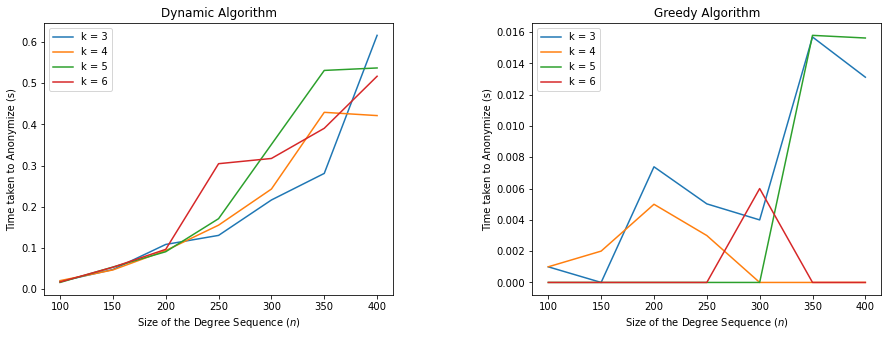

In [92]:
figure,(figure_dynamic, figure_greedy) = plt.subplots(1, 2,figsize=(15,5))
figure.subplots_adjust(hspace=0.4, wspace=0.4)

for k in range(3, 7): #Range of value of k
    size_of_sequence = list()
    dynamic_performance = list()
    greedy_performance = list()
    
    for size in range(100, 401, 50): #Size of the degree Sequence 
        degree_sequence = generateDegreeSequence(size)
        size_of_sequence.append(size) # store the size for plotting
        
        # For Degree sequence of this size Call dynamic algorithm and measure time 
        dynamic_start_timer = time.time()   
        dynamic.memorizedDPGraphAnonymization(k, degree_sequence, optimization = True)
        dynamic_end_timer = time.time()
        dynamic_time_taken = dynamic_end_timer - dynamic_start_timer 
        dynamic_performance.append(dynamic_time_taken)
        
        # For Degree sequence of this size Call greedy algorithm and measure time 
        greedy_start_timer = time.time()
        greedy.greedy_rec_algorithm(k, degree_sequence)
        greedy_end_timer = time.time()
        greedy_time_taken = greedy_end_timer - greedy_start_timer
        greedy_performance.append(greedy_time_taken)
    
    #Ploting size vs Performance for Dynamic Algorithm 
    figure_dynamic.plot(size_of_sequence, dynamic_performance, label='k = {}'.format(k)) 
    figure_dynamic.legend()                                                 
    
    #Ploting size vs Performance for Greedy Algorithm 
    figure_greedy.plot(size_of_sequence, greedy_performance, label='k = {}'.format(k))       
    figure_greedy.legend()                                                               
    
    
figure_dynamic.set_xlabel("Size of the Degree Sequence ($n$)")
figure_dynamic.set_ylabel("Time taken to Anonymize (s)")
figure_dynamic.set_title("Dynamic Algorithm")

figure_greedy.set_xlabel("Size of the Degree Sequence ($n$)")
figure_greedy.set_ylabel("Time taken to Anonymize (s)")
figure_greedy.set_title("Greedy Algorithm")


plt.show()

With degree lists from size $100 \to 400$ we can spot that Memorized dynamic programing is $O(n)$. But greedy algorithm seems constant in time. So, running time performance of Greedy Algorithm is better than **any** Dynamic Programming Algorithm.

### 3.2. Accuracy Performance Check
Performance can be in terms of accuracy of the outcome as well. In that case, the lose function is the key to measure such performance. Here we define an indicator called **Performance Ratio $(R)$**, 
<br>
$$
\begin{equation}
R = \frac{L\big(\hat{d}_{Greedy} - d\big)}{L\big(\hat{d}_{Dyanmic} - d\big)}
\end{equation}
$$
<br>
The dynamic programing algorithm in the module already returns the cost of anonymization. So, we do not have to calculate that. But for the Greedy algorithm only returns a anonymized sequence. So, we will use a method from "greedy" module called *calculateCost()* to calculate the anonymization cost.


#### Experiment
For experiments, we will switch from synthetic data to "quakers data" in the dataset and calculate $R$ for different degree anonymization factors $(k)$. 

##### Getting the Degree Sequence and correspondin Array Sequence from "quakers data"

In [48]:
import numpy as np
import networkx as nx
import csv

G = nx.Graph()
    
with open('Datasets/quakers_nodelist.csv' , 'r') as nodecsv:  # Open the file
    nodereader = csv.reader(nodecsv)  # Read the csv
        # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [ n for n in nodereader ][ 1: ]

node_names = [ n[ 0 ] for n in nodes ]  # Get a list of only the node names

with open('Datasets/quakers_edgelist.csv' , 'r') as edgecsv:  # Open the file
    edgereader = csv.reader(edgecsv)  # Read the csv
    edges = [ tuple(e) for e in edgereader ][ 1: ]  # Retrieve the data
G.add_nodes_from(node_names)
G.add_edges_from(edges)

degree_array = np.array(list(map(lambda x:x[1], G.degree())))

degree_sequence = np.sort(degree_array)[::-1].tolist() 
index_sequence = np.argsort(degree_array)[::-1].tolist()

##### Prepairing R values for different values of  $k$

In [68]:
list_of_R = list()
list_of_k = list()

for k in range(3, 21):
    # Appending value of k to the list
    list_of_k.append(k)
    # Calculating cost of dynamic anonymization for each k
    dynamic_cost, dynamic_anonymized_seq = dynamic.memorizedDPGraphAnonymization(k, degree_sequence, optimization=True)
    
    # Calculating cost of greedy anonymization for each k
    greedy_anonymized_seq = greedy.greedy_rec_algorithm(k, degree_sequence)
    greedy_cost = dynamic.calculateCost(degree_sequence, greedy_anonymized_seq)
    
    # Appending value of R to the list
    list_of_R.append(greedy_cost/dynamic_cost)

##### Plotting R vs $k$ Barchart

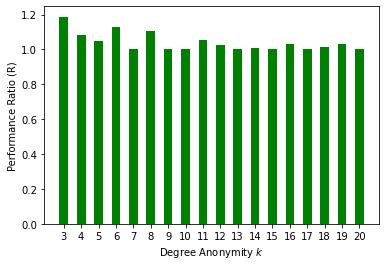

In [90]:
import matplotlib.pyplot as plt

plt.bar(list_of_k, list_of_R, color='g', width=0.5)
plt.xticks(list_of_k)
plt.xlabel("Degree Anonymity $k$")
plt.ylabel("Performance Ratio (R)")
plt.show()


### 4. Graph Construction

SyntaxError: invalid syntax (<ipython-input-84-82afaebca621>, line 1)